In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Dataset
spotify_data = pd.read_csv('/Users/davelotito/Documents/Data/top50.csv',encoding = "ISO-8859-1")

# Inspect Data

In [3]:
# Inspect dataset columns 
spotify_data.columns

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [4]:
spotify_data.sample(10)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
49,50,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
23,24,Soltera - Remix,Lunay,latin,92,78,80,-4,44,80,266,36,4,91
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
32,33,0.958333333333333,Maluma,reggaeton,96,71,78,-5,9,68,176,22,28,89
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
13,14,Otro Trago - Remix,Sech,panamanian pop,176,79,73,-2,6,76,288,7,20,87
34,35,Never Really Over,Katy Perry,dance pop,100,88,77,-5,32,39,224,19,6,89
28,29,Con Calma,Daddy Yankee,latin,94,86,74,-3,6,66,193,11,6,91
24,25,bad guy (with Justin Bieber),Billie Eilish,electropop,135,45,67,-11,12,68,195,25,30,89


In [5]:
spotify_data.dtypes

Unnamed: 0           int64
Track.Name          object
Artist.Name         object
Genre               object
Beats.Per.Minute     int64
Energy               int64
Danceability         int64
Loudness..dB..       int64
Liveness             int64
Valence.             int64
Length.              int64
Acousticness..       int64
Speechiness.         int64
Popularity           int64
dtype: object

# Clean Data & Columns

In [6]:
# Drop unwanted columns
spotify_data.drop(columns='Unnamed: 0', inplace=True)

In [17]:
# Clean up column names a bit & replace periods with underscores
spotify_data.columns = spotify_data.columns.str.replace('.', '_', regex=False)
# CLean up column names, removing underscores and standardizing them
spotify_data.drop(columns=['Length_', 'Valence_', 'Loudness__dB__'], inplace=True)
spotify_data.drop(columns=['Speechiness_', 'Acousticness__'], inplace=True)

In [49]:
spotify_data.sample(3)

,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Liveness,Popularity,Loudness_dB,Speechiness,Length,Valence
40,Higher Love,Kygo,edm,104,68,69,10,88,-7,3,228,40
15,No Guidance (feat. Drake),Chris Brown,dance pop,93,45,70,16,82,-7,15,261,14
43,Talk,Khalid,pop,136,40,90,6,84,-9,13,198,35


In [55]:
# Check for anomalies in data
spotify_data['Track_Name'].unique()

array(['Señorita', 'China', 'boyfriend (with Social House)',
       'Beautiful People (feat. Khalid)', 'Goodbyes (Feat. Young Thug)',
       "I Don't Care (with Justin Bieber)", 'Ransom', 'How Do You Sleep?',
       'Old Town Road - Remix', 'bad guy', 'Callaita',
       'Loco Contigo (feat. J. Balvin & Tyga)', 'Someone You Loved',
       'Otro Trago - Remix', 'Money In The Grave (Drake ft. Rick Ross)',
       'No Guidance (feat. Drake)', 'LA CANCIÓN',
       'Sunflower - Spider-Man: Into the Spider-Verse', 'Lalala',
       'Truth Hurts', 'Piece Of Your Heart', 'Panini',
       'No Me Conoce - Remix', 'Soltera - Remix',
       'bad guy (with Justin Bieber)', "If I Can't Have You",
       'Dance Monkey', "It's You", 'Con Calma', 'QUE PRETENDES',
       'Takeaway', '7 rings', '0.958333333333333',
       'The London (feat. J. Cole & Travis Scott)', 'Never Really Over',
       'Summer Days (feat. Macklemore & Patrick Stump of Fall Out Boy)',
       'Otro Trago', 'Antisocial (with Travis Sco

In [75]:
# Isolate the anomolie
anomolie = spotify_data[spotify_data['Track_Name'] =='0.958333333333333']

In [80]:
# Treat the anomalie with another Track Name
anomolie['Track_Name'] = anomolie['Track_Name'].str.replace('0.958333333333333', 'HP')

/var/folders/hp/3dhbxb5j0vzgq_s64y3bq0mw0000gn/T/ipykernel_5632/2353109319.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  anomolie['Track_Name'] = anomolie['Track_Name'].str.replace('0.958333333333333', 'HP')
/var/folders/hp/3dhbxb5j0vzgq_s64y3bq0mw0000gn/T/ipykernel_5632/2353109319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomolie['Track_Name'] = anomolie['Track_Name'].str.replace('0.958333333333333', 'HP')


In [85]:
# Append results back to original dataset
spotify_data = anomolie.append(spotify_data, ignore_index=True)


/var/folders/hp/3dhbxb5j0vzgq_s64y3bq0mw0000gn/T/ipykernel_5632/3370527999.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  spotify_data = anomolie.append(spotify_data, ignore_index=True)


In [95]:
spotify_data.corr()

,Beats_Per_Minute,Energy,Danceability,Liveness,Popularity,Loudness_dB,Speechiness,Length,Valence
Beats_Per_Minute,1.000000,0.035856,-0.101897,-0.157988,0.189535,0.011931,0.522166,-0.128057,-0.020732
Energy,0.035856,1.000000,0.023539,0.157020,-0.076768,0.671636,-0.074682,0.217057,0.442030
Danceability,-0.101897,0.023539,1.000000,-0.154412,-0.067423,0.019737,-0.086114,-0.007213,0.178299
Liveness,-0.157988,0.157020,-0.154412,1.000000,0.088833,0.254461,-0.136474,0.137362,0.009951
Popularity,0.189535,-0.076768,-0.067423,0.088833,1.000000,-0.040853,0.242914,-0.091426,-0.312272
Loudness_dB,0.011931,0.671636,0.019737,0.254461,-0.040853,1.000000,-0.258069,0.214034,0.240354
Speechiness,0.522166,-0.074682,-0.086114,-0.136474,0.242914,-0.258069,1.000000,0.028355,-0.035736
Length,-0.128057,0.217057,-0.007213,0.137362,-0.091426,0.214034,0.028355,1.000000,-0.025242
Valence,-0.020732,0.442030,0.178299,0.009951,-0.312272,0.240354,-0.035736,-0.025242,1.000000


<AxesSubplot:>

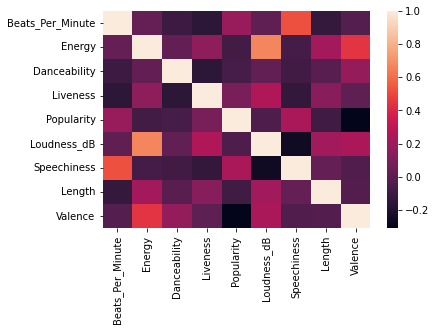

In [94]:
# Create heatmap to see correlations between columns
sns.heatmap(spotify_data.corr())

In [89]:
spotify_data.sort_values('Popularity', ascending=False)

,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Liveness,Popularity,Loudness_dB,Speechiness,Length,Valence
10,bad guy,Billie Eilish,electropop,135,43,70,10,95,-11,38,194,56
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,11,94,-4,7,175,18
11,Callaita,Bad Bunny,reggaeton,176,62,61,24,93,-5,31,251,24
2,China,Anuel AA,reggaeton flow,105,81,79,8,92,-4,9,302,61
15,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,12,92,-4,5,205,10
7,Ransom,Lil Tecca,trap music,180,64,75,7,92,-6,29,131,23
18,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,dfw rap,90,48,76,7,91,-6,5,158,91
20,Truth Hurts,Lizzo,escape room,158,62,72,12,91,-3,11,173,41
37,Otro Trago,Sech,panamanian pop,176,70,75,11,91,-5,34,226,62
22,Panini,Lil Nas X,country rap,154,59,70,12,91,-6,8,115,48


In [194]:
spotify_data.sort_values(by='Artist.Name',ascending=True)
spotify_data.drop(columns=['Loudness..dB..'],inplace=True)

In [195]:
spotify_data.head(51)
spotify_data.sort_values(by=['Track.Name','Artist.Name','Genre'],ascending=True,inplace=True)

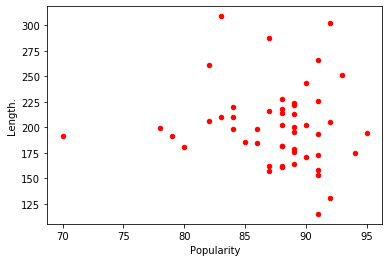

In [197]:
spotify_data.plot(kind='scatter',x='Popularity',y='Length.',color='red')
plt.show()

In [199]:
spotify_data.loc[(spotify_data['Beats.Per.Minute'] >= 75) & (spotify_data['Energy'] == 71 ), ['Beats.Per.Minute', 'Genre']]

,Beats.Per.Minute,Genre
32,96,reggaeton
11,96,dance pop
